# Clustering
## _k_ Means

based on Iris Example by Belen Sanchez  
https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [0,3]]  # Select the 0th and 3rd columns
y = iris.target

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Text(0, 0.5, 'Petal Width')

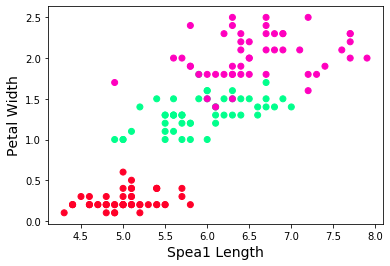

In [5]:
%matplotlib inline
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)

In [6]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [7]:
centers = km.cluster_centers_
print(centers)

[[5.89259259 1.46296296]
 [5.00555556 0.3037037 ]
 [6.85714286 2.01190476]]


Text(0.5, 1.0, 'Predicted')

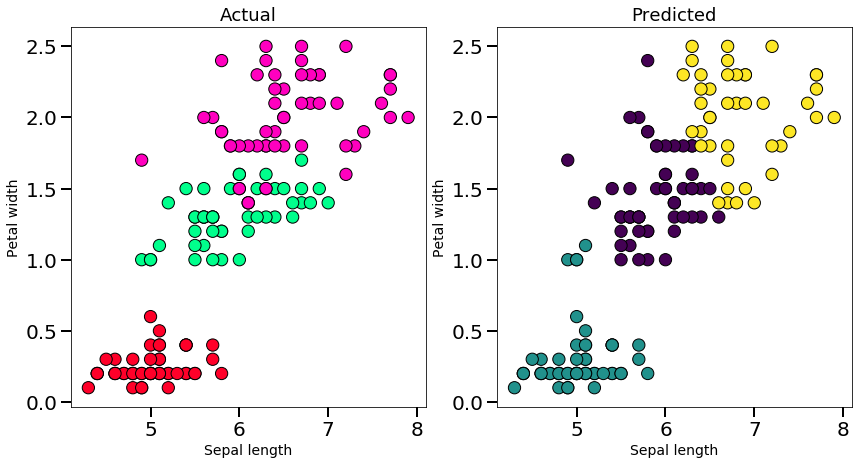

In [8]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,7))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, 
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=14)
axes[0].set_ylabel('Petal width', fontsize=14)
axes[1].set_xlabel('Sepal length', fontsize=14)
axes[1].set_ylabel('Petal width', fontsize=14)
axes[0].tick_params(length=10, width=2, colors='k', labelsize=20)
axes[1].tick_params(length=10, width=2, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

## k-Means Stability
`.inertia_` attribute is the Sum of Squared Errors (SSE) of the objects from their cluster centroid.   
`KMeans` runs  multiple times (controlled by the `n_init` parameter) and returns the clustering with the smallest SSE.  
If we force `n_init = 1` we can see the different SSE values. 

In [9]:
X = iris.data
y = iris.target

In [10]:
for rs in range(5):
    km = KMeans(n_clusters = 3, n_init = 1, random_state=rs)
    km.fit(X)
    print("SSE: {:.3f}".format(km.inertia_))

SSE: 78.856
SSE: 78.856
SSE: 142.754
SSE: 78.856
SSE: 78.851


In [11]:
km = KMeans(n_clusters = 3, n_init = 10, random_state=1)
km.fit(X)
print("SSE: {:.3f}".format(km.inertia_))

SSE: 78.851


## _k_ Means Shortcomings
Sklearn example:   
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py


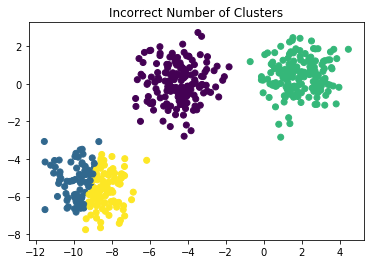

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=4, random_state=random_state).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Clusters")
plt.show()

## Elongated clusters  
_k_ Means expects convex spherical clusters  
`make moons` produces moon shaped clusters

In [13]:
Xm,ym = datasets.make_moons(n_samples=n_samples, noise=.1)

203.383636403215


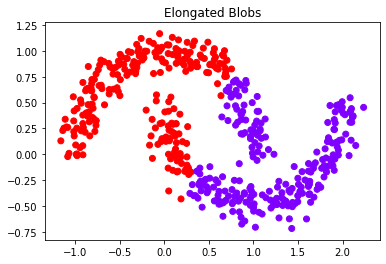

In [14]:
random_state = 11
ec = KMeans(n_clusters=2, n_init = 1, random_state=random_state)
y_pred = ec.fit_predict(Xm)
plt.scatter(Xm[:, 0], Xm[:, 1], c=y_pred, cmap='rainbow')
plt.title("Elongated Blobs")
print(ec.inertia_)

## Different size/density
Here, the proportion of the space (area) covered by the cluster is varied.  
Samples belonging to the most spread out cluster have been assigned to another cluster in error. 

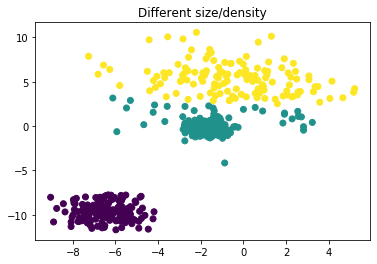

In [15]:
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Different size/density")
plt.show()

## Different densities
The area covered by the clusters is the same but the density is varied.
This doesn't seem to be a problem. 

Text(0.5, 1.0, 'Different densities')

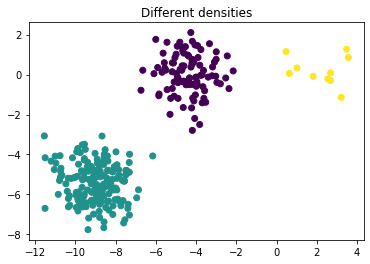

In [16]:
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Different densities")

